In [18]:
import json
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Flatten, Conv1D, MaxPooling1D, SimpleRNN, GRU, LSTM, LSTM, Input, Embedding, TimeDistributed, Flatten, Dropout,Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
with open('intents.json') as file:
    data = json.load(file)


In [14]:
import matplotlib.pyplot as plt

In [3]:
labels = {}
questions = []
answers = []

In [4]:
for intent in data['intents']:
    label = intent['tag']
    if label not in labels:
        labels[label] = len(labels)
    for pattern in intent['patterns']:
        questions.append(pattern)
        answers.append(label)


In [5]:
num_labels = len(labels)
print(f'Found {num_labels} labels:', labels)


Found 37 labels: {'greeting': 0, 'goodbye': 1, 'age': 2, 'name': 3, 'depression': 4, 'parents': 5, 'types': 6, 'capable': 7, 'stress': 8, 'suicide': 9, 'fail': 10, 'causes': 11, 'age group': 12, 'country': 13, 'school': 14, 'world': 15, 'anxiety': 16, 'oversleep': 17, 'sleepless': 18, 'diabetes': 19, 'duration': 20, 'effects': 21, '333': 22, 'lonely': 23, 'like': 24, 'ugly': 25, 'nothing': 26, 'better': 27, 'hate': 28, 'winning': 29, 'break': 30, 'sad': 31, 'bully': 32, 'bully2': 33, 'runaway': 34, 'quitting': 35, 'time': 36}


In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print(f'Found {vocab_size} unique tokens.')


Found 137 unique tokens.


In [7]:
max_length = max([len(q.split()) for q in questions])
print(f'Maximum sequence length is {max_length} words.')


Maximum sequence length is 9 words.


In [8]:
# Convert text to sequences
question_sequences = tokenizer.texts_to_sequences(questions)
padded_questions = pad_sequences(question_sequences, maxlen=max_length, padding='post')

In [9]:
# Convert labels to categorical
categorical_labels = tf.keras.utils.to_categorical([labels[label] for label in answers], num_classes=num_labels)

In [50]:
# Create the model
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=max_length))
model.add(LSTM(250, return_sequences=True))
model.add(GRU(250))
model.add(Dense(num_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# Train the model
history1 = model.fit(padded_questions, categorical_labels, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
3/3 [==============================] - 5s 44ms/step - loss: 3.6086 - accuracy: 0.0294
Epoch 2/50
3/3 [==============================] - 0s 35ms/step - loss: 3.5344 - accuracy: 0.1176
Epoch 3/50
3/3 [==============================] - 0s 39ms/step - loss: 3.4207 - accuracy: 0.1029
Epoch 4/50
3/3 [==============================] - 0s 35ms/step - loss: 3.2471 - accuracy: 0.1176
Epoch 5/50
3/3 [==============================] - 0s 34ms/step - loss: 3.1667 - accuracy: 0.1618
Epoch 6/50
3/3 [==============================] - 0s 36ms/step - loss: 3.0171 - accuracy: 0.2647
Epoch 7/50
3/3 [==============================] - 0s 35ms/step - loss: 2.8863 - accuracy: 0.1765
Epoch 8/50
3/3 [==============================] - 0s 35ms/step - loss: 2.8605 - accuracy: 0.1176
Epoch 9/50
3/3 [==============================] - 0s 36ms/step - loss: 2.7425 - accuracy: 0.1765
Epoch 10/50
3/3 [==============================] - 0s 38ms/step - loss: 2.6329 - accuracy: 0.1618
Epoch 11/50
3/3 [============

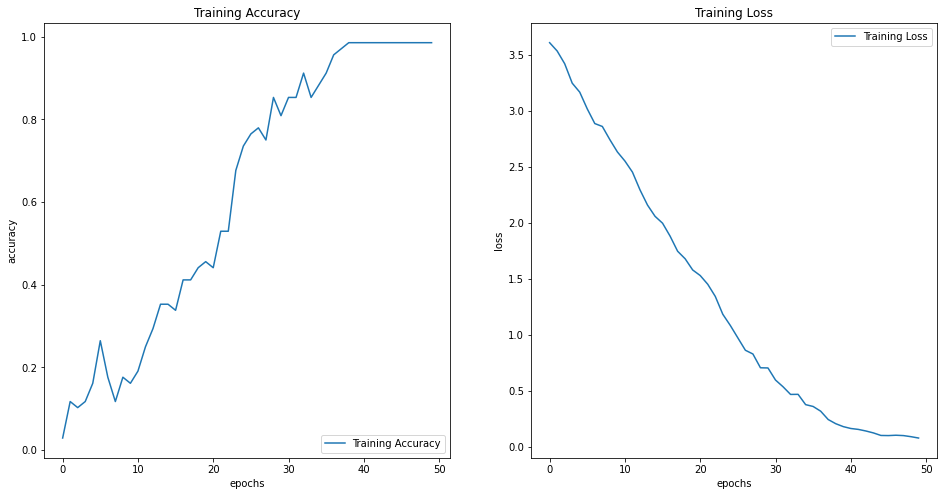

In [53]:
# Learning curves 

acc = history1.history['accuracy']
loss=history1.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [43]:
# Test the model
while True:
    question = input('You: ')
    if question == 'exit':
        break
    question_sequence = tokenizer.texts_to_sequences([question])
    padded_question = pad_sequences(question_sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded_question)[0]
    predicted_label = np.argmax(prediction)
    for label, index in labels.items():
        if index == predicted_label:
            responses = data['intents'][index]['responses']
            print("Sadie :",random.choice(responses))
            break

You: Hi
1/1 [==============================] - 0s 27ms/step
Sadie : Hello!
You: exit


## RNN ##

In [54]:
# Create the model
model2 = Sequential()
model2.add(Embedding(vocab_size, 300, input_length=max_length))
model2.add(SimpleRNN(100))
model2.add(Dense(num_labels, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
# Train the model
history2 = model2.fit(padded_questions, categorical_labels, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3/3 [==============================] - 1s 6ms/step - loss: 3.6027 - accuracy: 0.0294
Epoch 2/20
3/3 [==============================] - 0s 6ms/step - loss: 3.3367 - accuracy: 0.4412
Epoch 3/20
3/3 [==============================] - 0s 6ms/step - loss: 3.1339 - accuracy: 0.5147
Epoch 4/20
3/3 [==============================] - 0s 6ms/step - loss: 2.9251 - accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 6ms/step - loss: 2.7191 - accuracy: 0.5735
Epoch 6/20
3/3 [==============================] - 0s 6ms/step - loss: 2.5072 - accuracy: 0.6324
Epoch 7/20
3/3 [==============================] - 0s 7ms/step - loss: 2.2847 - accuracy: 0.6618
Epoch 8/20
3/3 [==============================] - 0s 6ms/step - loss: 2.0716 - accuracy: 0.6471
Epoch 9/20
3/3 [==============================] - 0s 6ms/step - loss: 1.8582 - accuracy: 0.6765
Epoch 10/20
3/3 [==============================] - 0s 6ms/step - loss: 1.6502 - accuracy: 0.7206
Epoch 11/20
3/3 [======================

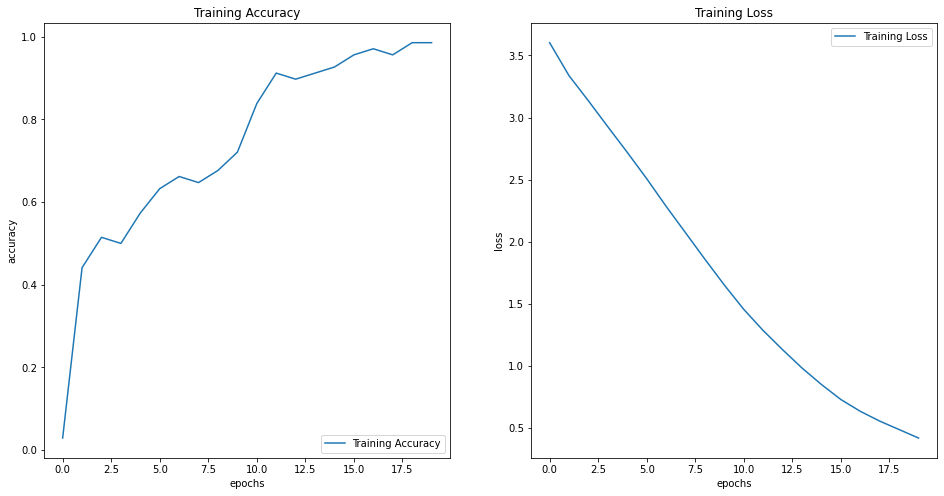

In [56]:
# Learning curves 

acc = history2.history['accuracy']
loss=history2.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## CNN ##

In [57]:
model3 = Sequential()
model3.add(Embedding(vocab_size,300, input_length=max_length))
model3.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model3.add(MaxPooling1D(pool_size = 4))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_labels, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
# Train the model
history3 = model3.fit(padded_questions, categorical_labels, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3/3 [==============================] - 1s 4ms/step - loss: 3.6153 - accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 9ms/step - loss: 3.5886 - accuracy: 0.1176
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 3.5686 - accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 3.5486 - accuracy: 0.2794
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 3.5271 - accuracy: 0.3088
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 3.5027 - accuracy: 0.3676
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 3.4748 - accuracy: 0.3971
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 3.4465 - accuracy: 0.3971
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 3.4137 - accuracy: 0.4412
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 3.3777 - accuracy: 0.5147
Epoch 11/50
3/3 [==================

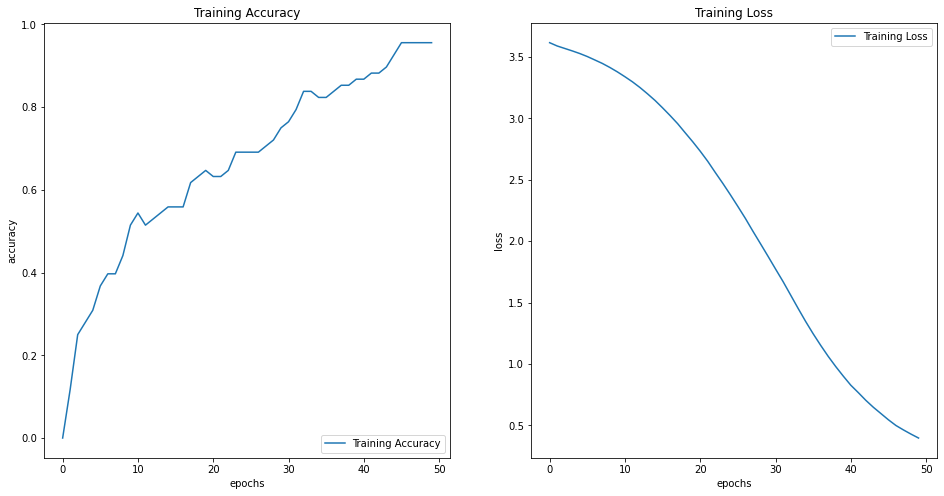

In [59]:
# Learning curves 

acc = history3.history['accuracy']
loss=history3.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## LSTM ##

In [60]:
# Create the model
model4 = Sequential()
model4.add(Embedding(vocab_size, 300, input_length=max_length))
model4.add(LSTM(250))
model4.add(Dense(num_labels, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# Train the model
history4 = model4.fit(padded_questions, categorical_labels, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3/3 [==============================] - 3s 29ms/step - loss: 3.6059 - accuracy: 0.0147
Epoch 2/50
3/3 [==============================] - 0s 29ms/step - loss: 3.5427 - accuracy: 0.1324
Epoch 3/50
3/3 [==============================] - 0s 29ms/step - loss: 3.4651 - accuracy: 0.1324
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 3.3512 - accuracy: 0.1324
Epoch 5/50
3/3 [==============================] - 0s 39ms/step - loss: 3.2154 - accuracy: 0.1324
Epoch 6/50
3/3 [==============================] - 0s 36ms/step - loss: 3.2008 - accuracy: 0.1618
Epoch 7/50
3/3 [==============================] - 0s 34ms/step - loss: 3.1134 - accuracy: 0.2206
Epoch 8/50
3/3 [==============================] - 0s 34ms/step - loss: 3.0161 - accuracy: 0.2500
Epoch 9/50
3/3 [==============================] - 0s 29ms/step - loss: 2.9493 - accuracy: 0.2500
Epoch 10/50
3/3 [==============================] - 0s 27ms/step - loss: 2.8866 - accuracy: 0.2059
Epoch 11/50
3/3 [============

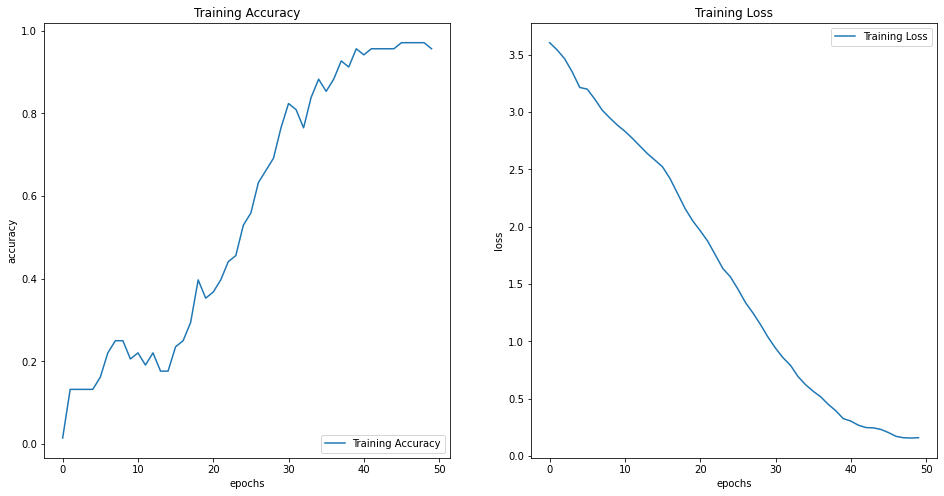

In [66]:
# Learning curves 

acc = history4.history['accuracy']
loss=history4.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## GRU ##

In [64]:
# Create the model
model5 = Sequential()
model5.add(Embedding(vocab_size, 300, input_length=max_length))
model5.add(GRU(250))
model5.add(Dense(num_labels, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# Train the model
history5 = model5.fit(padded_questions, categorical_labels, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3/3 [==============================] - 3s 20ms/step - loss: 3.6106 - accuracy: 0.0882
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 3.5513 - accuracy: 0.1324
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 3.5043 - accuracy: 0.1471
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 3.4327 - accuracy: 0.1324
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 3.3473 - accuracy: 0.1324
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 3.2931 - accuracy: 0.1471
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 3.2819 - accuracy: 0.1471
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 3.1515 - accuracy: 0.1471
Epoch 9/50
3/3 [==============================] - 0s 21ms/step - loss: 3.0765 - accuracy: 0.2206
Epoch 10/50
3/3 [==============================] - 0s 21ms/step - loss: 2.9848 - accuracy: 0.2059
Epoch 11/50
3/3 [============

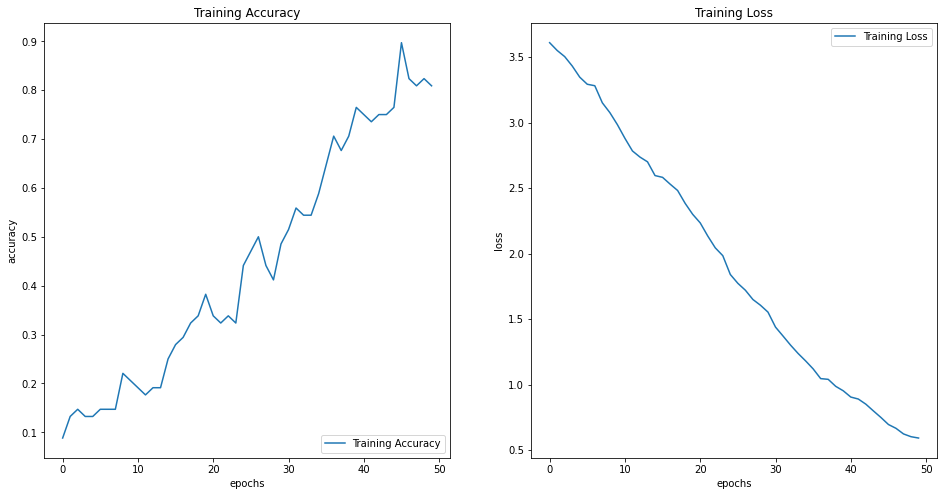

In [67]:
# Learning curves 

acc = history5.history['accuracy']
loss=history5.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## BiLSTM ##

In [68]:
# Create the model
model6 = Sequential()
model6.add(Embedding(vocab_size, 300, input_length=max_length))
model6.add(Bidirectional(LSTM(250)))
model6.add(Dense(num_labels, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
# Train the model
history6 = model6.fit(padded_questions, categorical_labels, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
3/3 [==============================] - 5s 50ms/step - loss: 3.6055 - accuracy: 0.0735
Epoch 2/30
3/3 [==============================] - 0s 49ms/step - loss: 3.5231 - accuracy: 0.1324
Epoch 3/30
3/3 [==============================] - 0s 49ms/step - loss: 3.4229 - accuracy: 0.1324
Epoch 4/30
3/3 [==============================] - 0s 56ms/step - loss: 3.2932 - accuracy: 0.1324
Epoch 5/30
3/3 [==============================] - 0s 49ms/step - loss: 3.2070 - accuracy: 0.1324
Epoch 6/30
3/3 [==============================] - 0s 50ms/step - loss: 3.1042 - accuracy: 0.1765
Epoch 7/30
3/3 [==============================] - 0s 56ms/step - loss: 2.9958 - accuracy: 0.2647
Epoch 8/30
3/3 [==============================] - 0s 53ms/step - loss: 2.8990 - accuracy: 0.3529
Epoch 9/30
3/3 [==============================] - 0s 51ms/step - loss: 2.7634 - accuracy: 0.3382
Epoch 10/30
3/3 [==============================] - 0s 50ms/step - loss: 2.6621 - accuracy: 0.3824
Epoch 11/30
3/3 [============

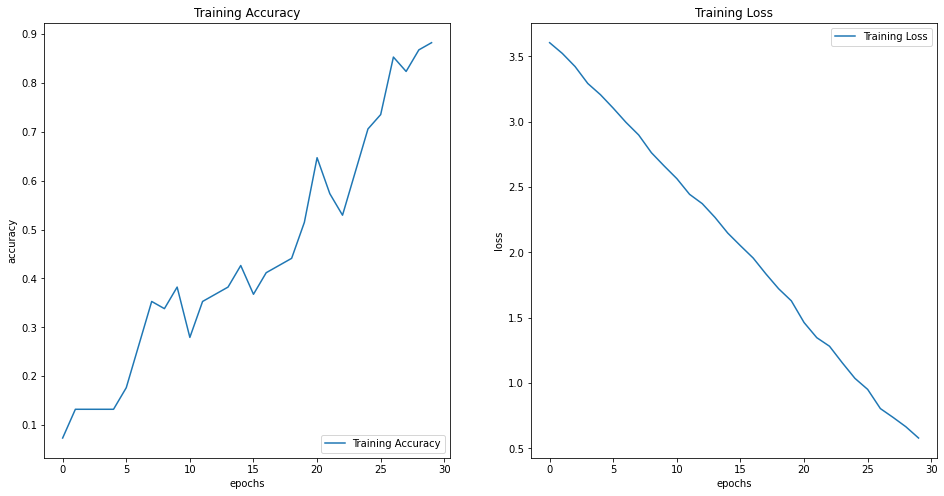

In [70]:
# Learning curves 

acc = history6.history['accuracy']
loss=history6.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

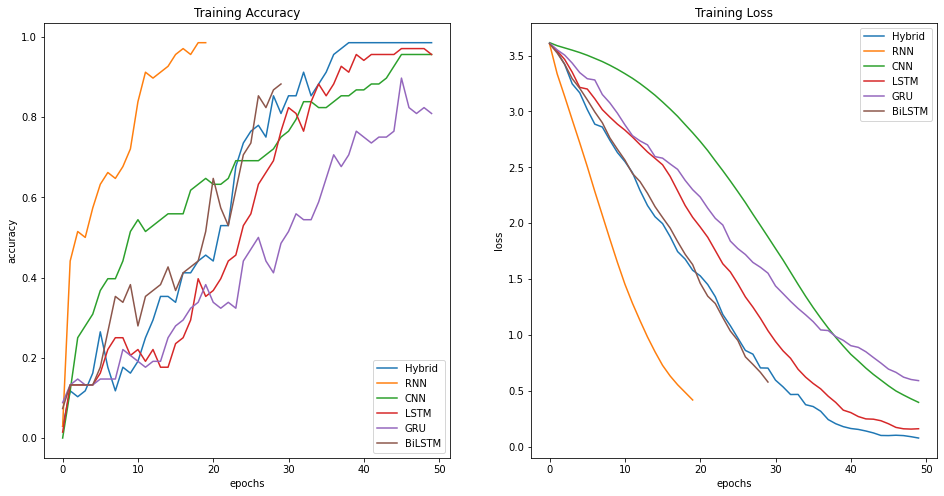

In [72]:
# Learning curves 

acc1 = history1.history['accuracy']
loss1 =history1.history['loss']

acc2 = history2.history['accuracy']
loss2 = history2.history['loss']

acc3 = history3.history['accuracy']
loss3 =history3.history['loss'] 

acc4 = history4.history['accuracy']
loss4 = history4.history['loss']

acc5 = history5.history['accuracy']
loss5 =history5.history['loss']

acc6 = history6.history['accuracy']
loss6 =history6.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc1, label='Hybrid')
plt.plot(acc2, label='RNN')
plt.plot(acc3, label='CNN')
plt.plot(acc4, label='LSTM')
plt.plot(acc5, label='GRU')
plt.plot(acc6, label='BiLSTM')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss1, label='Hybrid')
plt.plot(loss2, label='RNN')
plt.plot(loss3, label='CNN')
plt.plot(loss4, label='LSTM')
plt.plot(loss5, label='GRU')
plt.plot(loss6, label='BiLSTM')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()